**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: José Eduardo De Moraes López
*   MATRÍCULA: A01634782

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import os
DIR = "/content/drive/MyDrive/Maestría/DS"
os.chdir(DIR)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [113]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [114]:
response_df.info() #Método para obtener los tipo de datos
num_cols = response_df.select_dtypes(include=['number']).columns #separación variables númericas
cat_cols = response_df.select_dtypes(include=['object']).columns #separación variables cat
print("Número de columnas numéricas: ", len(num_cols))
print("Número de columnas cualitativas: ", len(cat_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
Número de columnas numéricas:  139
Número de columnas cualitativas:  11


In [115]:
describe_num = response_df.describe(include=['number']) #descripción variables num
describe_num

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [116]:
describe_object = response_df.describe(include=['object']) #descripción variables cat
describe_object

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [117]:
weight = response_df['Weight'] #valores únicos en weight
weight.unique()

array([ 48.,  58.,  67.,  59.,  77.,  50.,  90.,  55.,  60.,  57.,  65.,
        78.,  85.,  70.,  54.,  51.,  56.,  63.,  80.,  87.,  46.,  72.,
       101.,  62.,  41.,  75.,  45.,  64.,  71.,  74.,  81.,  52.,  84.,
        83.,  47.,  82.,  53.,  68.,  61.,  69.,  49.,  66., 103.,  nan,
       100.,  97.,  79.,  73.,  89.,  98.,  88.,  42.,  44.,  96.,  76.,
        91., 120.,  92.,  95.,  43.,  86., 110.,  93., 111., 113.,  99.,
       125., 165., 150., 105.])

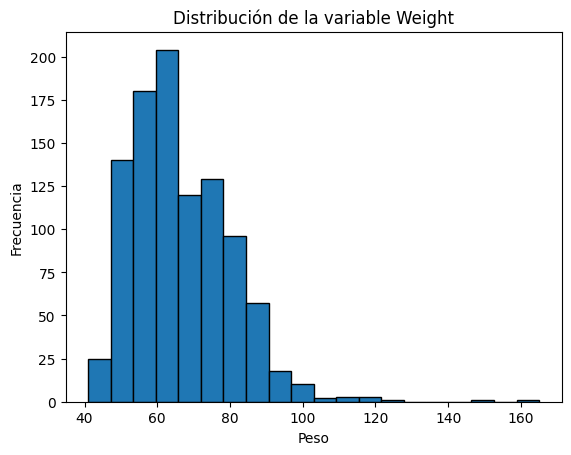

In [118]:
plt.hist(response_df['Weight'], bins=20, edgecolor='black') #histograma weight
plt.title('Distribución de la variable Weight')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

Un histograma es la gráfica ideal ya que weight es una variable cuantitativa discreta con una gran cantidad de datos como se puede apreciar.

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [119]:
weight_skewness = weight.skew() #Asímetría y kurtosis para descripción de la distribución
weight_kurtosis = weight.kurtosis()
print(f"Asimetría de weight: {weight_skewness}")
print(f"Curtosis de weight: {weight_kurtosis}")

Asimetría de weight: 1.2237251927527477
Curtosis de weight: 3.969322481289579


La distribución del peso está sesgada a la derecha, de acuerdo al valor positivo de asimetría, esto significa que hay una cola más larga en el lado derecho de la distribución, lo que indica que hay algunos valores de peso relativamente altos que afectan la media. También se puede apreciar viusalmente en la gráfica y finalmente el curtosis nos indica que hay valores outliers en la variable, no muchos pero estan presentes.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [120]:
missing_values = weight.isnull().sum() #valores faltantes
total_values = len(weight)
missing_percentage = (missing_values / total_values) * 100
print("Número de valores faltantes en weight\n", missing_values)
print("Porcentaje de valores faltantes en weight\n", missing_percentage)

Número de valores faltantes en weight
 20
Porcentaje de valores faltantes en weight
 1.9801980198019802


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [121]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [122]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

In [123]:
response_df['Weight_Missing'] = response_df['Weight'].isna() #separación valores faltantes

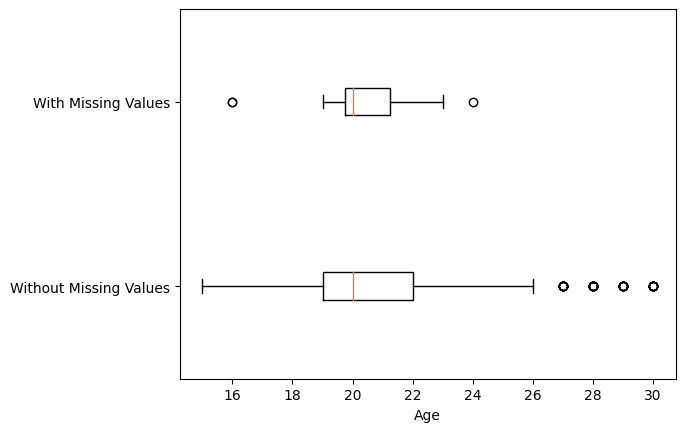

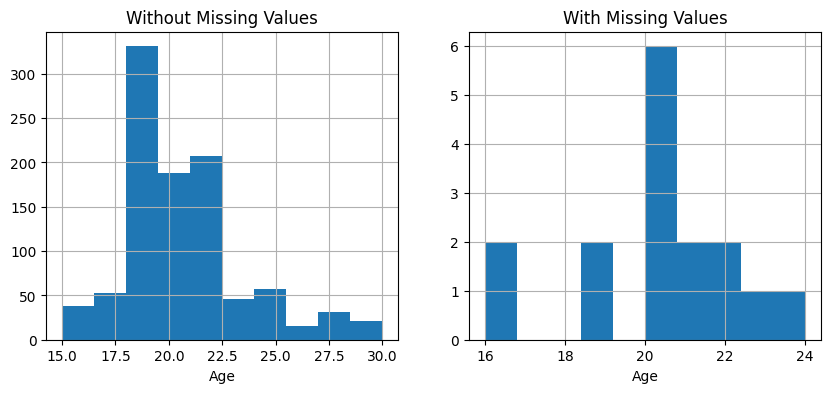

p-value of t-test: 0.7258243979822129


In [124]:
Diagnose_MV_Numerical(response_df, 'Age', response_df['Weight_Missing']) #diagnostico significancia age

El análisis de la variable Age en relación con los valores faltantes en Weight reveló un p-valor de 0.7258. Este valor indica que no hay una diferencia estadísticamente significativa en la edad entre los grupos de encuestados con y sin valores faltantes en la variable Weight. El resultado sugiere que la falta de datos en Weight no está relacionada con la edad de los encuestados, lo que permite descartar la edad como un factor influyente en este contexto.

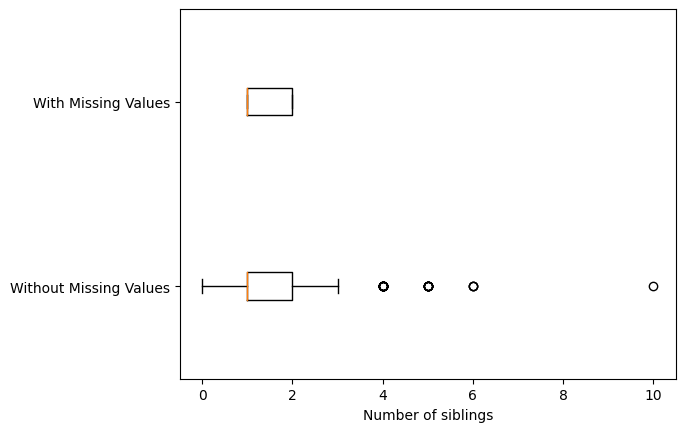

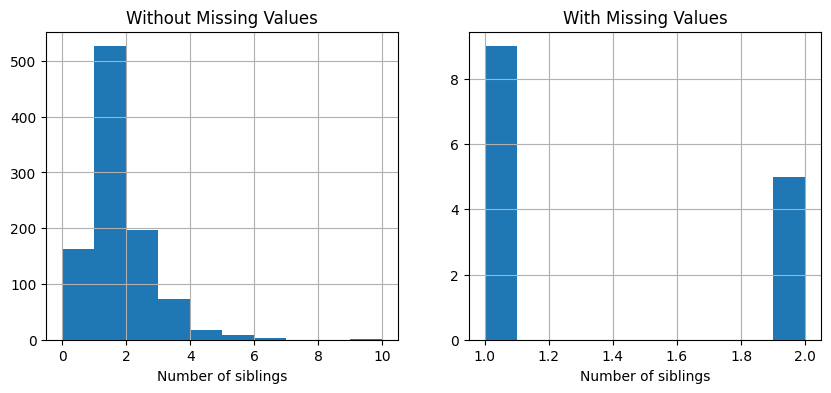

p-value of t-test: 0.8255092107556896


In [125]:
Diagnose_MV_Numerical(response_df, 'Number of siblings', response_df['Weight_Missing']) #diagnostico significancia number of siblings

El análisis de la variable Number of Siblings en relación con los valores faltantes en Weight arrojó un p-valor de 0.8255. Este resultado indica que no existe una diferencia estadísticamente significativa en el número de hermanos entre los grupos de encuestados con y sin datos faltantes en la variable Weight.

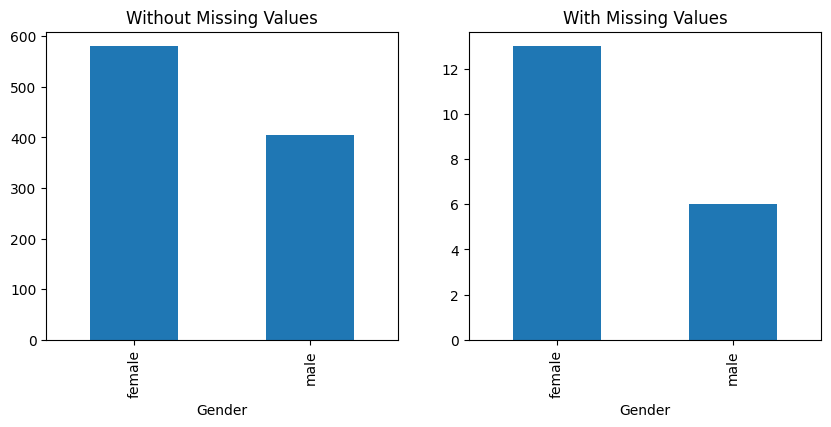

p-value of Chi_squared test: 0.5472167199163878


In [126]:
Diagnose_MV_Categorical(response_df, 'Gender', response_df['Weight_Missing']) #diagnostico significancia gender

El análisis de la variable Gender en relación con los valores faltantes en Weight arrojó un p-valor de 0.5472. Este resultado indica que no hay una relación estadísticamente significativa entre el género de los encuestados y la presencia de datos faltantes en la variable Weight.

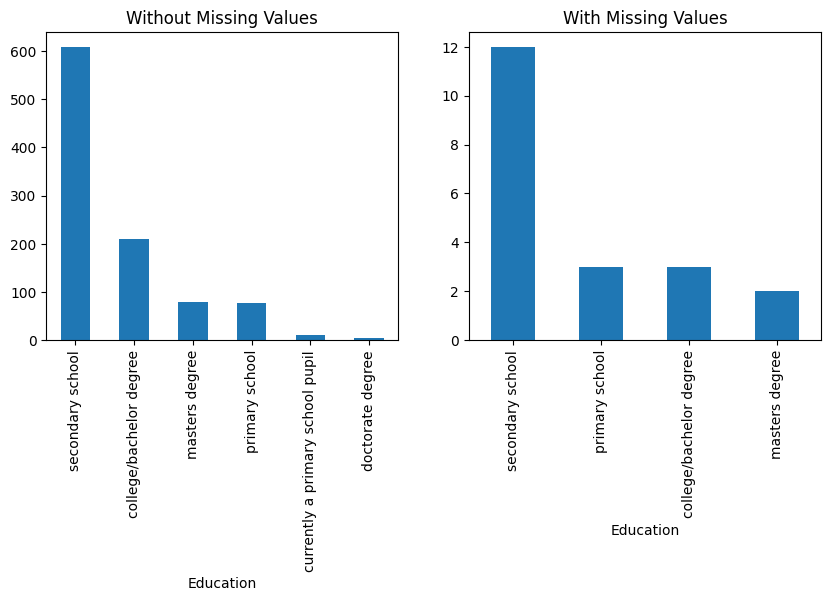

p-value of Chi_squared test: 0.8424822989541867


In [127]:
Diagnose_MV_Categorical(response_df, 'Education', response_df['Weight_Missing']) #diagnostico significancia education

El análisis de la variable Education en relación con los valores faltantes en Weight arrojó un p-valor de 0.8425. Este resultado indica que no hay una relación estadísticamente significativa entre el nivel educativo de los encuestados y la presencia de datos faltantes en la variable Weight.

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [128]:
mean_weight = response_df['Weight'].mean() #medidas de tendencia central
median_weight = response_df['Weight'].median()
mode_weight = response_df['Weight'].mode()[0]
print(f'Media de Weight: {mean_weight}')
print(f'Mediana de Weight: {median_weight}')
print(f'Moda de Weight: {mode_weight}')

Media de Weight: 66.40505050505051
Mediana de Weight: 64.0
Moda de Weight: 60.0


Viendo las medidas de tendencia central la que es más adecuada es la mediana, el promedio tiene un valor decimal que puede ser complicado de representar en la gráfica con los valores del df que son discretos, además la mediana se destaca por su robustez frente a valores atípicos. A diferencia de la media, la mediana proporciona una representación más precisa del peso central, especialmente en conjuntos de datos con posibles extremos, asegurando que la imputación no esté sesgada por esos valores.

In [129]:
median_weight = response_df['Weight'].median() #imputación mediana
response_df['Weight'] = response_df['Weight'].fillna(median_weight)
print(f'Se han imputado los valores faltantes de Weight con la mediana: {median_weight}')

Se han imputado los valores faltantes de Weight con la mediana: 64.0


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

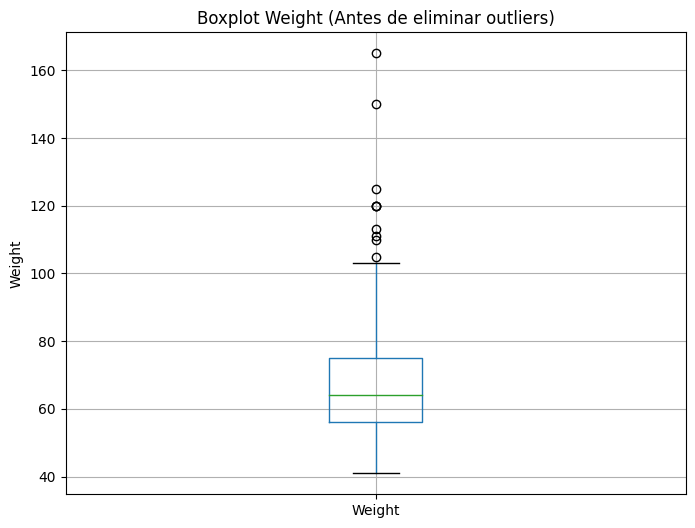

Número de valores atípicos en Weight: 10


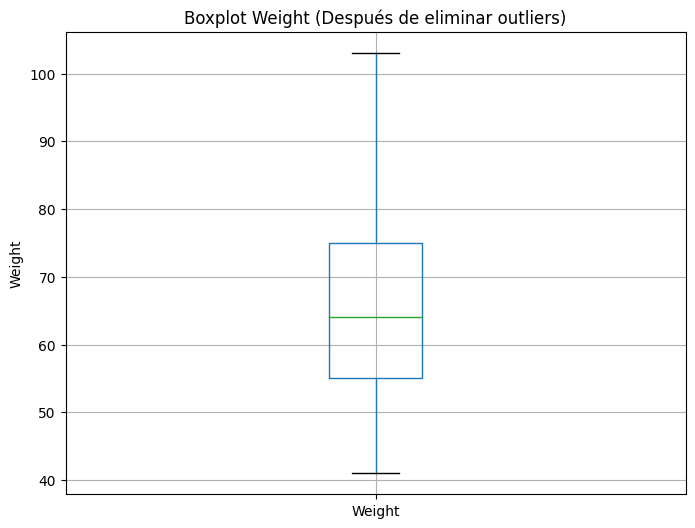

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Weight_Missing
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow,False
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats,False
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow,False
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow,False
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow,False


In [130]:
plt.figure(figsize=(8, 6)) #boxplot weght e identificación de valores atípicos y eliminación
response_df.boxplot(column='Weight')
plt.title('Boxplot Weight (Antes de eliminar outliers)')
plt.ylabel('Weight')
plt.show()

Q1_weight = response_df['Weight'].quantile(0.25)
Q3_weight = response_df['Weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

outliers_weight = response_df[(response_df['Weight'] < lower_bound_weight) | (response_df['Weight'] > upper_bound_weight)]

num_outliers_weight = outliers_weight.shape[0]
print(f'Número de valores atípicos en Weight: {num_outliers_weight}')

outliers_weight_df = outliers_weight.copy()

response_df_clean_weight = response_df[~((response_df['Weight'] < lower_bound_weight) | (response_df['Weight'] > upper_bound_weight))]

plt.figure(figsize=(8, 6))
response_df_clean_weight.boxplot(column='Weight')
plt.title('Boxplot Weight (Después de eliminar outliers)')
plt.ylabel('Weight')
plt.show()
outliers_weight_df.head()

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

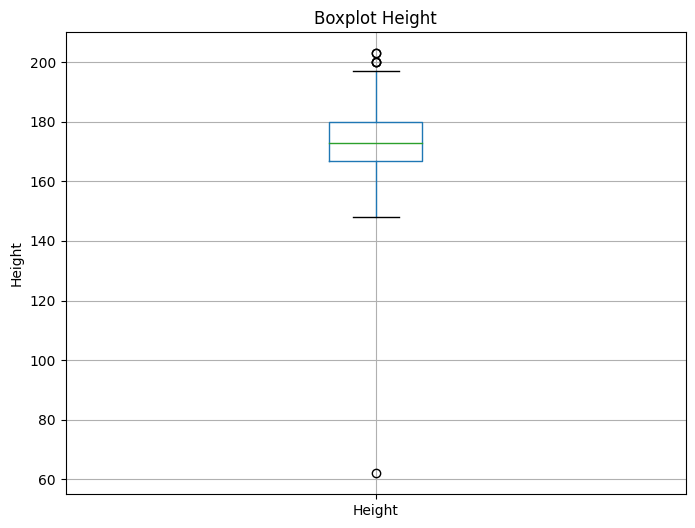

Número de valores atípicos en Height: 6


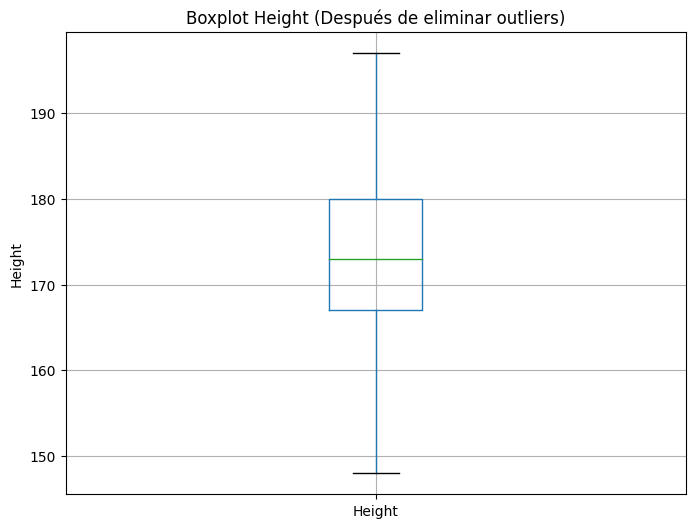

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Weight_Missing
97,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,200.0,75.0,1.0,male,right handed,primary school,no,village,block of flats,False
220,5.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,3.0,1.0,...,200.0,90.0,2.0,male,right handed,secondary school,no,village,house/bungalow,False
547,5.0,4.0,1.0,4.0,2.0,5.0,3.0,1.0,4.0,5.0,...,203.0,80.0,2.0,male,left handed,secondary school,no,village,house/bungalow,False
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow,False
799,5.0,3.0,1.0,2.0,3.0,4.0,5.0,2.0,4.0,5.0,...,203.0,89.0,2.0,male,right handed,secondary school,yes,city,block of flats,False


In [131]:
plt.figure(figsize=(8, 6)) #boxplot height e identificación de valores atípicos y eliminación
response_df.boxplot(column='Height')
plt.title('Boxplot Height')
plt.ylabel('Height')
plt.show()

Q1_height = response_df['Height'].quantile(0.25)
Q3_height = response_df['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

outliers_height = response_df[(response_df['Height'] < lower_bound_height) | (response_df['Height'] > upper_bound_height)]

num_outliers_height = outliers_height.shape[0]
print(f'Número de valores atípicos en Height: {num_outliers_height}')

outliers_height_df = outliers_height.copy()

response_df_clean_height = response_df[~((response_df['Height'] < lower_bound_height) | (response_df['Height'] > upper_bound_height))]

plt.figure(figsize=(8, 6))
response_df_clean_height.boxplot(column='Height')
plt.title('Boxplot Height (Después de eliminar outliers)')
plt.ylabel('Height')
plt.show()
outliers_height_df.head()

In [132]:
response_df_clean_combined = pd.merge(response_df_clean_weight, response_df_clean_height, how='inner') #tamaño de nuevo data frame
print(f'Tamaño final del dataframe combinado (Weight y Height): {response_df_clean_combined.shape}')

Tamaño final del dataframe combinado (Weight y Height): (995, 151)


9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [133]:
response_df_clean_combined['Height_m'] = response_df_clean_combined['Height'] / 100 #Calcular el BMI


response_df_clean_combined['BMI'] = response_df_clean_combined['Weight'] / (response_df_clean_combined['Height_m'] ** 2)


print(response_df_clean_combined[['Weight', 'Height', 'Height_m', 'BMI']].head())

   Weight  Height  Height_m        BMI
0    48.0   163.0      1.63  18.066167
1    58.0   163.0      1.63  21.829952
2    67.0   176.0      1.76  21.629649
3    59.0   172.0      1.72  19.943213
4    59.0   170.0      1.70  20.415225


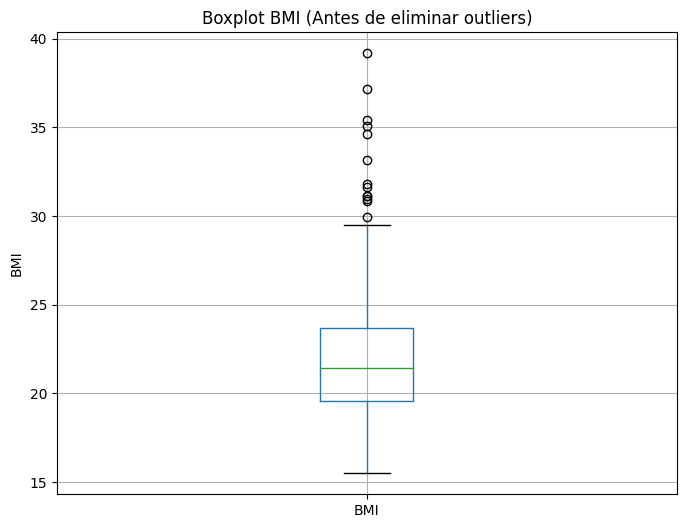

Número de valores atípicos en BMI: 13


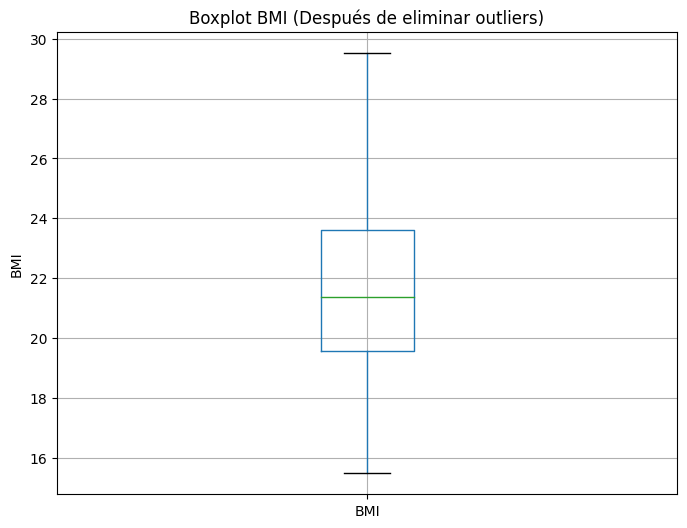

Número de observaciones después de eliminar los valores atípicos en BMI: 976


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Weight_Missing,Height_m,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,0.0,female,right handed,secondary school,yes,city,block of flats,False,1.70,31.141869
150,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,1.0,male,right handed,secondary school,no,city,block of flats,False,1.80,30.864198
155,5.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,5.0,2.0,...,1.0,male,left handed,doctorate degree,yes,city,block of flats,False,1.77,30.961729
290,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,1.0,female,right handed,secondary school,no,city,house/bungalow,False,1.84,35.444234
355,5.0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,...,0.0,male,right handed,secondary school,yes,city,block of flats,False,1.79,29.961612


In [134]:
response_df_clean = response_df_clean_height.copy() #boxplot BMI e identificación de valores atípicos y eliminación

response_df_clean.reset_index(drop=True, inplace=True)

response_df_clean = response_df_clean[~response_df_clean.index.isin(outliers_height_df.index)]
response_df_clean = response_df_clean[~response_df_clean.index.isin(outliers_weight_df.index)]

response_df_clean['Height_m'] = response_df_clean['Height'] / 100
response_df_clean['BMI'] = response_df_clean['Weight'] / (response_df_clean['Height_m'] ** 2)

plt.figure(figsize=(8, 6))
response_df_clean.boxplot(column='BMI')
plt.title('Boxplot BMI (Antes de eliminar outliers)')
plt.ylabel('BMI')
plt.show()

Q1_bmi = response_df_clean['BMI'].quantile(0.25)
Q3_bmi = response_df_clean['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

outliers_bmi = response_df_clean[(response_df_clean['BMI'] < lower_bound_bmi) | (response_df_clean['BMI'] > upper_bound_bmi)]

num_outliers_bmi = outliers_bmi.shape[0]
print(f'Número de valores atípicos en BMI: {num_outliers_bmi}')

outliers_bmi_df = outliers_bmi.copy()

response_df_clean_bmi = response_df_clean[~((response_df_clean['BMI'] < lower_bound_bmi) | (response_df_clean['BMI'] > upper_bound_bmi))]

plt.figure(figsize=(8, 6))
response_df_clean_bmi.boxplot(column='BMI')
plt.title('Boxplot BMI (Después de eliminar outliers)')
plt.ylabel('BMI')
plt.show()

print(f'Número de observaciones después de eliminar los valores atípicos en BMI: {response_df_clean_bmi.shape[0]}')
outliers_bmi_df.head()

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [135]:
categorical_vars = response_df.select_dtypes(include=['object', 'category']) # Imprimir los nombres de las columnas categóricas


print("Nombres de las columnas categóricas:")
for column in categorical_vars.columns:
    print(column)

Nombres de las columnas categóricas:
Smoking
Alcohol
Punctuality
Lying
Internet usage
Gender
Left - right handed
Education
Only child
Village - town
House - block of flats


<Figure size 1000x600 with 0 Axes>

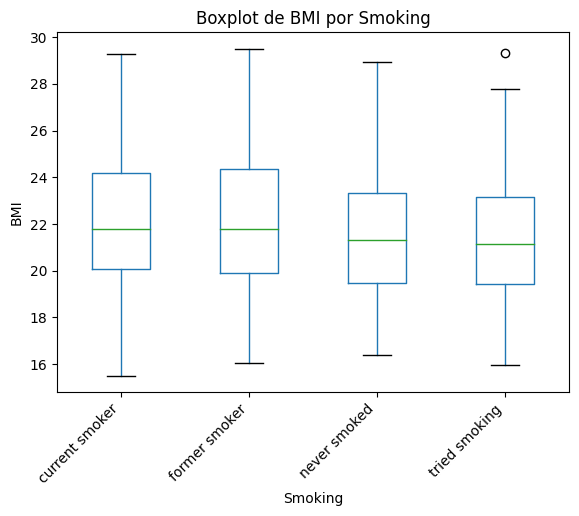

<Figure size 1000x600 with 0 Axes>

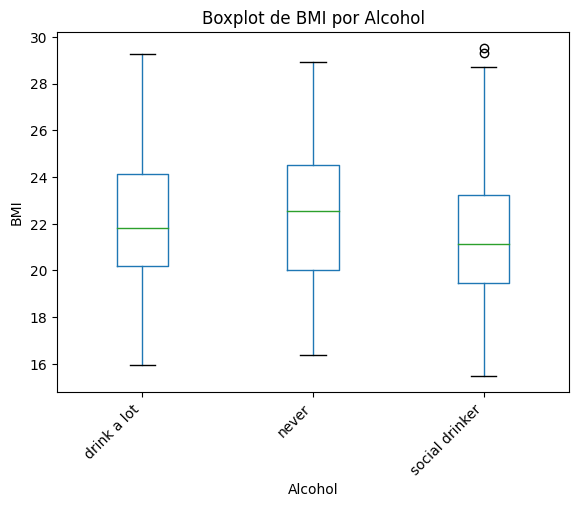

<Figure size 1000x600 with 0 Axes>

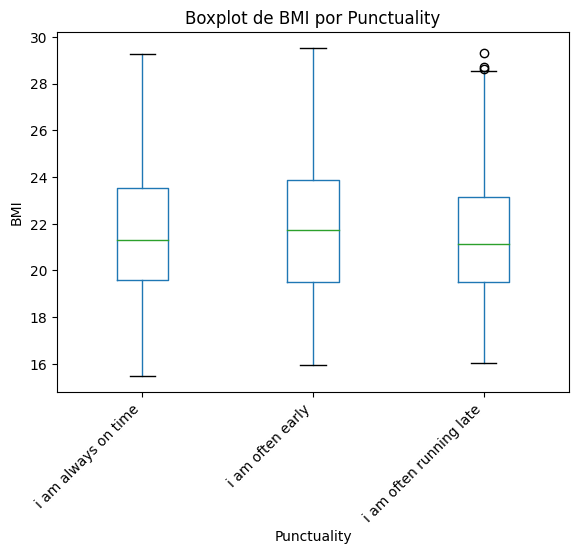

<Figure size 1000x600 with 0 Axes>

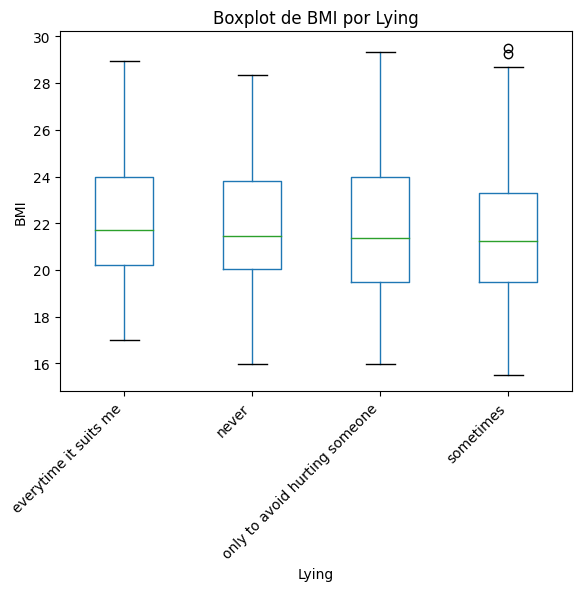

<Figure size 1000x600 with 0 Axes>

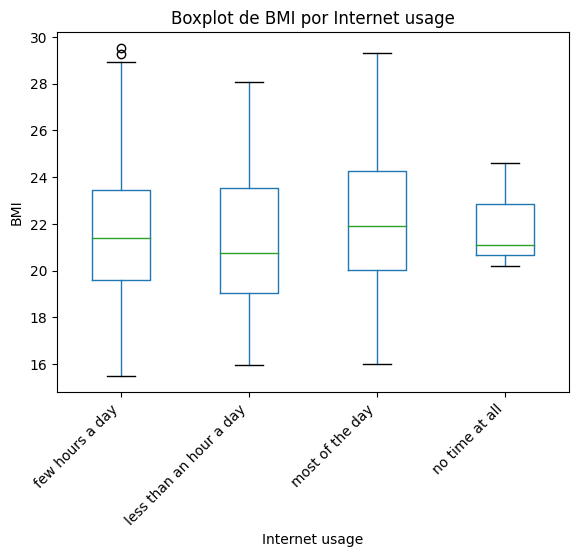

<Figure size 1000x600 with 0 Axes>

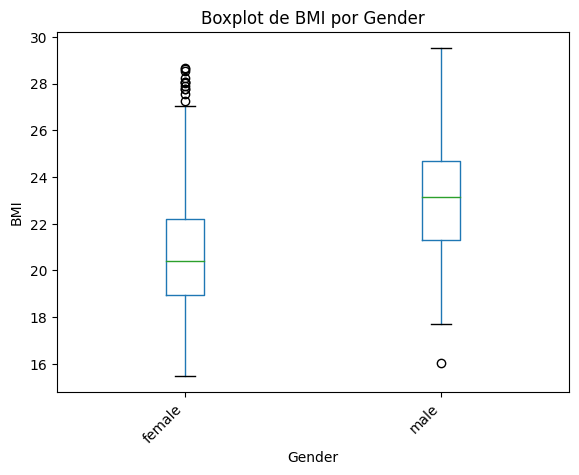

<Figure size 1000x600 with 0 Axes>

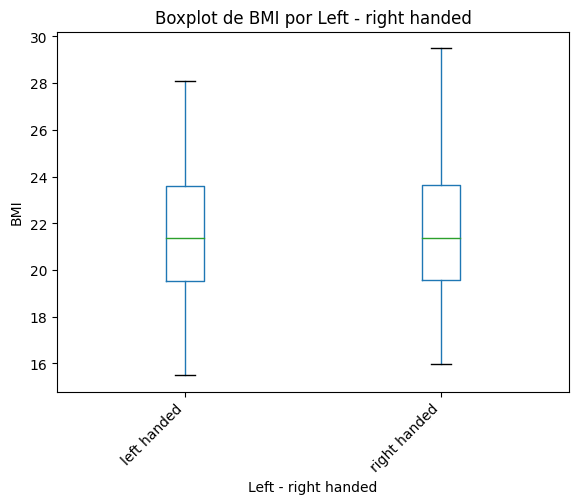

<Figure size 1000x600 with 0 Axes>

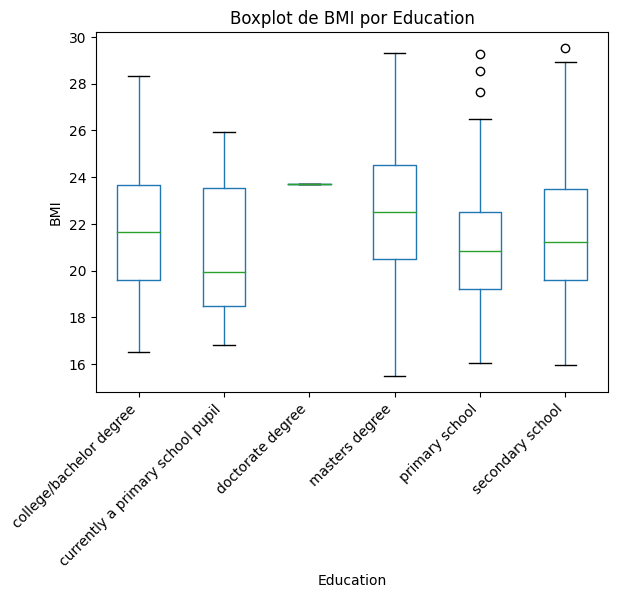

<Figure size 1000x600 with 0 Axes>

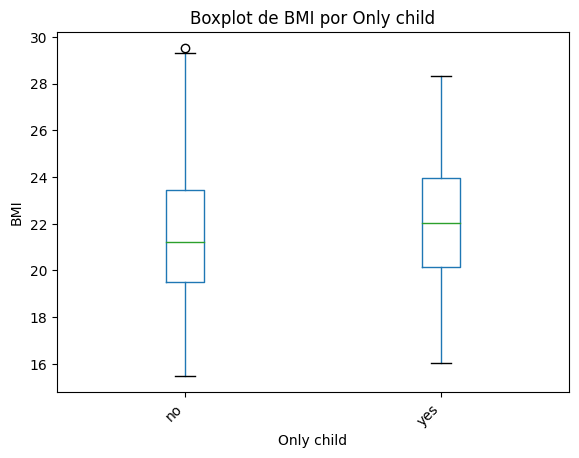

<Figure size 1000x600 with 0 Axes>

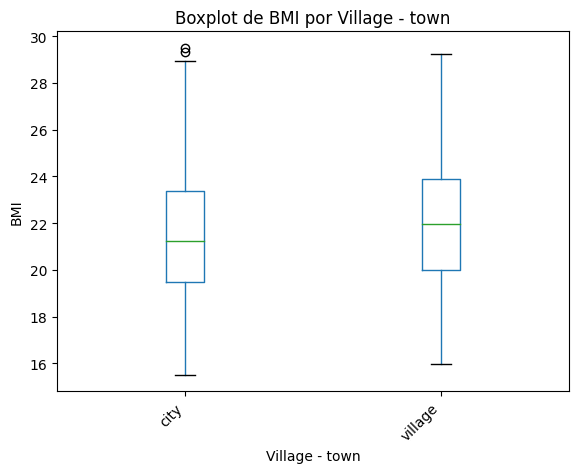

<Figure size 1000x600 with 0 Axes>

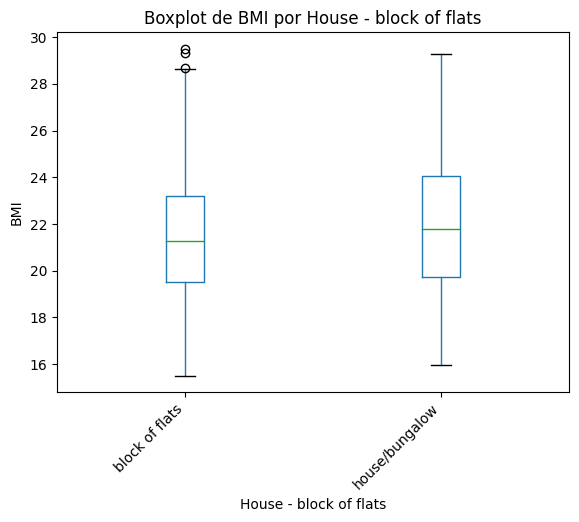

In [136]:
categorical_vars = [
    'Smoking',
    'Alcohol',
    'Punctuality',
    'Lying',
    'Internet usage',
    'Gender',
    'Left - right handed',
    'Education',
    'Only child',
    'Village - town',
    'House - block of flats'
]

# Crear boxplots para cada variable categórica
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    response_df_clean_bmi.boxplot(column='BMI', by=var, grid=False)
    plt.title(f'Boxplot de BMI por {var}')
    plt.suptitle('')
    plt.xlabel(var)
    plt.ylabel('BMI')


    plt.xticks(rotation=45, ha='right')

    plt.show()

El boxplot de Internet Usage me llamó mucho la atención, ya que se nota una gran diferencia entre las personas que usan Internet la mayor parte del día y las que no lo hacen. Se puede asumir que las personas que utilizan menos el Internet son más activas y, en vez de estar en línea, dedican su tiempo a otras actividades que pueden ayudar a reducir el BMI y alcanzar un estado más saludable. También me llamó la atención que no hay mucha diferencia en algo que creía que iba a ser un factor clave: el consumo de alcohol y el hábito de fumar. Entre bebedores y fumadores no hay mucha diferencia si revisamos el resultado del boxplot. Sin duda, ha sido una actividad interesante en la que se pueden hacer inferencias o hipótesis que no se presentan explícitamente en la base de datos.